<a href="https://colab.research.google.com/github/wajahatqazii/Exchange_Rate_Visualization/blob/main/exchange_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exchange Rate Analysis
This Colab notebook analyzes exchange rate data from a provided dataset, focusing on the years 2022, 2023, and 2024. It calculates the percent change in exchange rates for each currency pair between these years and visualizes the trends using interactive and colorful plots.



## Install these Packages

In [ ]:
!pip install pandas fastparquet matplotlib

# Visualizations

<ipython-input-1-d4fb3e067cf3>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_year1 = df_year1.mean()
<ipython-input-1-d4fb3e067cf3>:21: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_year2 = df_year2.mean()
<ipython-input-1-d4fb3e067cf3>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_year1 = df_year1.mean()
<ipython-input-1-d4fb3e067cf3>:21: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_year2 = df_year2.mean()
<ipython-input-1-d4fb3e067cf3>:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in

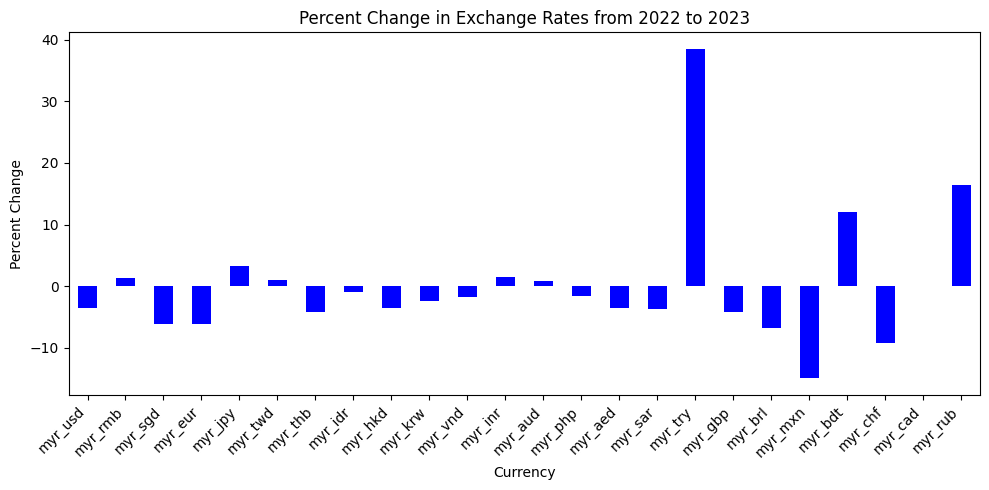

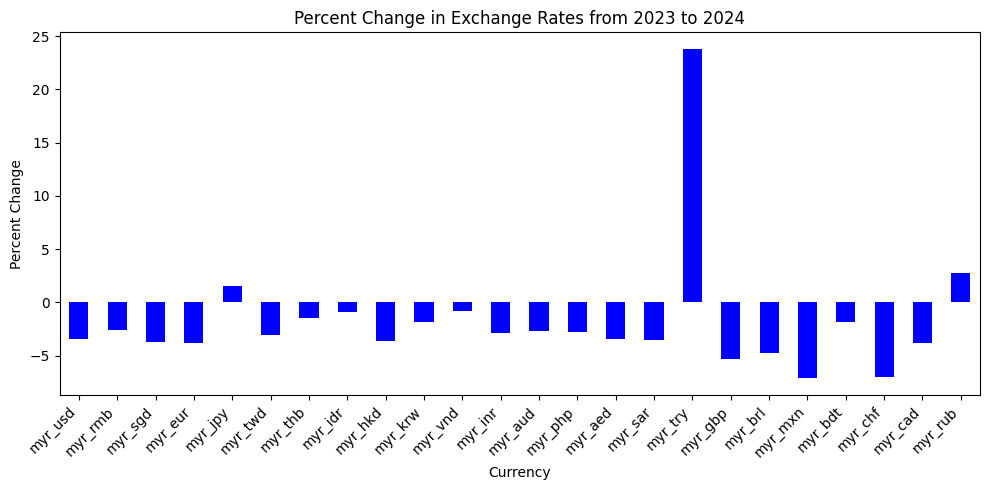

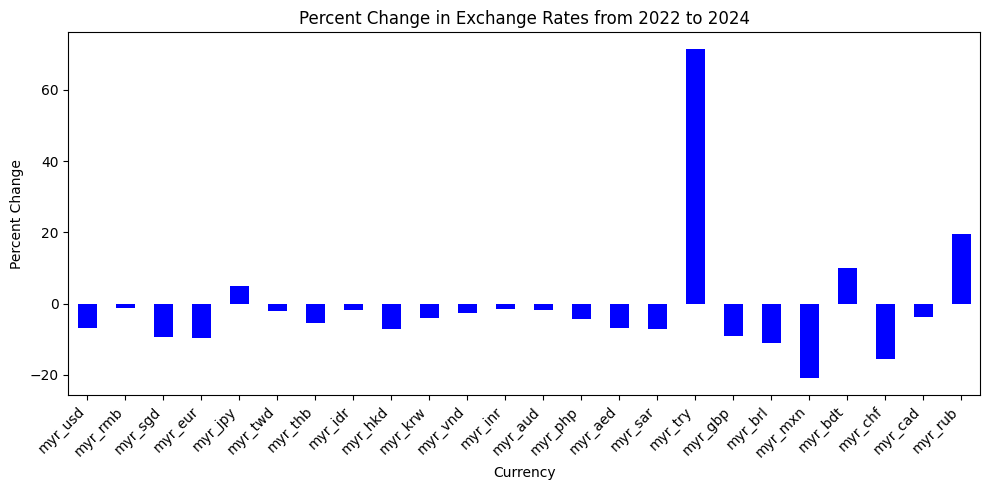

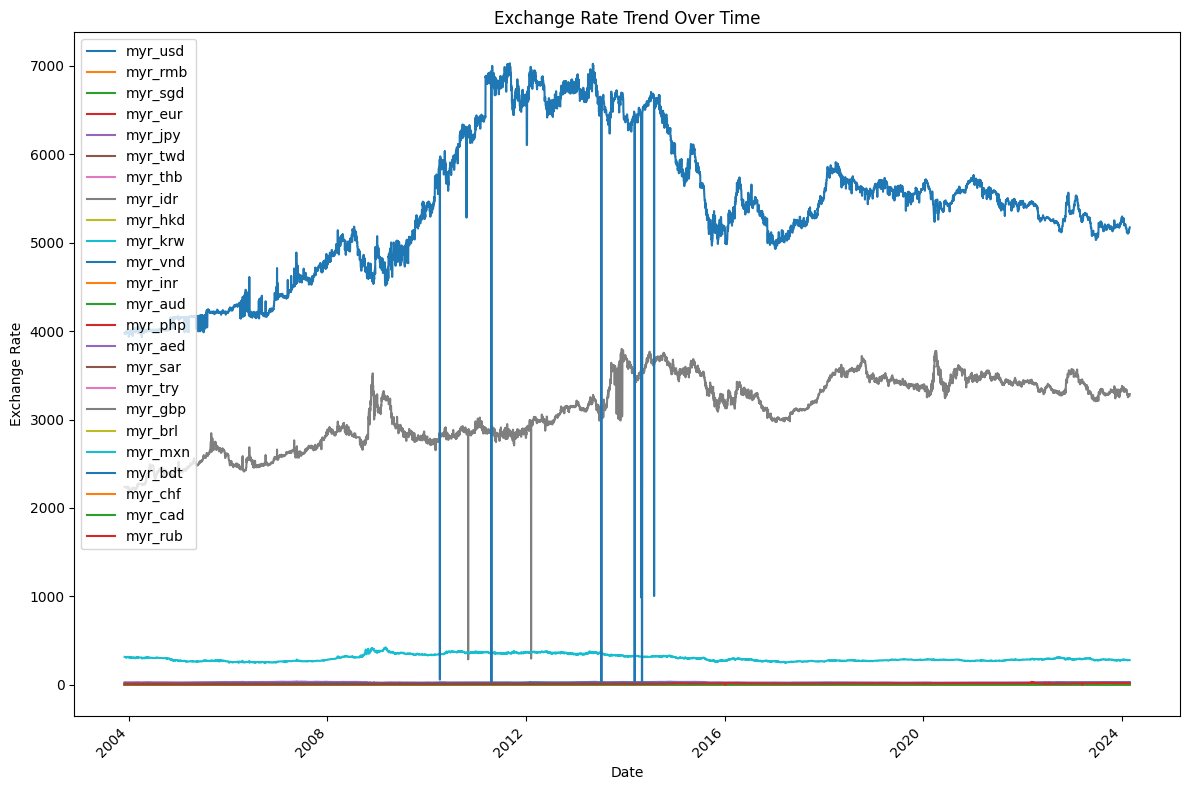

In [ ]:
# Install these packages using pip
# Pip install pandas matplotlib fastparquet

import pandas as pd
import matplotlib.pyplot as plt

def read_exchange_rate_data(url):
    """Read the exchange rate data into a DataFrame."""
    df = pd.read_parquet(url)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    return df

def calculate_percent_change(df, year1, year2):
    """Calculate percent change between two years."""
    df_year1 = df[df['date'].dt.year == year1]
    df_year2 = df[df['date'].dt.year == year2]

    # Compute mean for each year
    mean_year1 = df_year1.mean()
    mean_year2 = df_year2.mean()

    # Calculate percent change
    percent_change = (mean_year2 - mean_year1) / mean_year1 * 100
    return percent_change

def plot_percent_change(percent_change, title):
    """Plot percent change in exchange rates."""
    plt.figure(figsize=(10, 5))
    percent_change.plot(kind='bar', color='blue')
    plt.title(title)
    plt.xlabel('Currency')
    plt.ylabel('Percent Change')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_exchange_rate_trend(df):
    """Visualize exchange rate trends over time."""
    plt.figure(figsize=(12, 8))
    currencies = df.columns[1:]  # Exclude the 'date' column
    for currency in currencies:
        plt.plot(df['date'], df[currency], label=currency)
    plt.title('Exchange Rate Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Define the URL for the dataset
    URL_DATA = 'https://storage.data.gov.my/finsector/exchangerates.parquet'

    # Read exchange rate data
    exchange_rate_df = read_exchange_rate_data(URL_DATA)

    # Calculate percent change for each year pair
    percent_change_2022_2023 = calculate_percent_change(exchange_rate_df, 2022, 2023)
    percent_change_2023_2024 = calculate_percent_change(exchange_rate_df, 2023, 2024)
    percent_change_2022_to_2024 = calculate_percent_change(exchange_rate_df, 2022, 2024)

    # Plot percent change for each year pair
    plot_percent_change(percent_change_2022_2023, 'Percent Change in Exchange Rates from 2022 to 2023')
    plot_percent_change(percent_change_2023_2024, 'Percent Change in Exchange Rates from 2023 to 2024')
    plot_percent_change(percent_change_2022_to_2024, 'Percent Change in Exchange Rates from 2022 to 2024')

    # Plot exchange rate trend over time
    plot_exchange_rate_trend(exchange_rate_df)